# A more complete demo of Speasy

## Only for Google Colab users:

In [ ]:
%pip install --upgrade ipympl speasy

In [ ]:
try:
    from google.colab import output

    output.enable_custom_widget_manager()
except:
    print("Not running inside Google Collab")

## For all users:

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import speasy as spz
from speasy.products import SpeasyVariable
from typing import List
import numpy as np
from datetime import datetime

#plt.rcParams["figure.figsize"] = (20, 4)

## Few products from CDAWeb

You can browse CDAWeb inventory using your python environement completion and get any 'variable'(CDA name) or 'parameter' (Speasy name) on any valid time interval.
Then most SpeasyVariables can be plotted directly (using matplotlib backend).

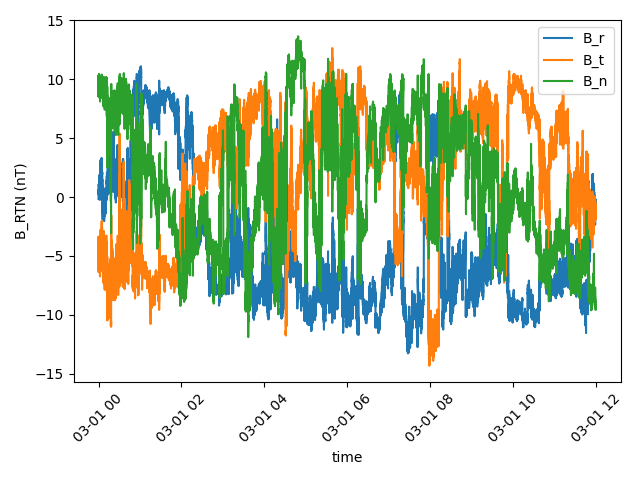

In [2]:
solo_fgm: SpeasyVariable = spz.get_data(
    spz.inventories.tree.cda.Solar_Orbiter.SOLO.MAG.SOLO_L2_MAG_RTN_NORMAL.B_RTN,
    "2022-03-01",
    "2022-03-01T12",
)
plt.figure()
solo_fgm.plot()
plt.tight_layout()
plt.show()


It is quite common to have **fill values**, you can replace them by **NaN** by simply calling `replace_fillval_by_nan`

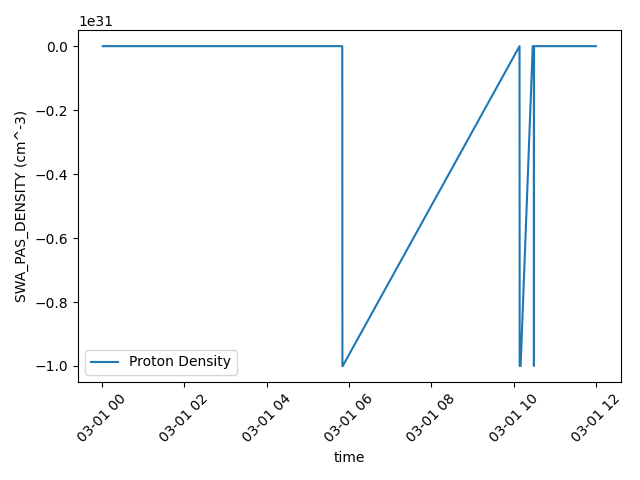

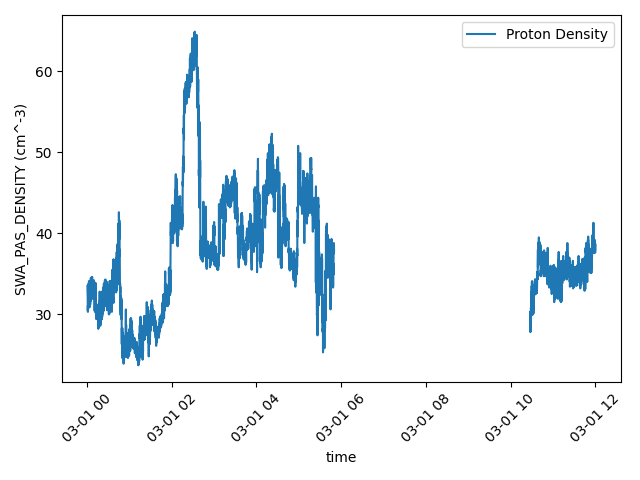

In [3]:
swa_pas_density: SpeasyVariable = spz.get_data(
    spz.inventories.tree.cda.Solar_Orbiter.SOLO.SWA_PAS_MOM.SOLO_LL02_SWA_PAS_MOM.SWA_PAS_DENSITY,
    "2022-03-01",
    "2022-03-01T12",
)
plt.figure("With 1e31 fill values")
swa_pas_density.plot()
plt.tight_layout()
plt.show()
plt.figure()
swa_pas_density.replace_fillval_by_nan().plot()
plt.tight_layout()
plt.show()


You can also get and plot spectograms

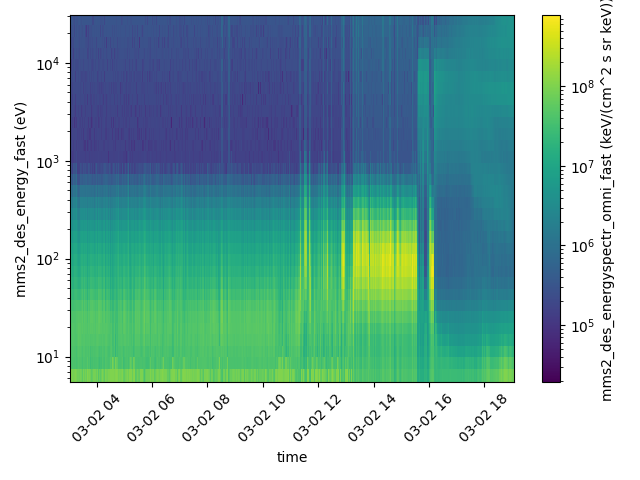

In [4]:
mms2_des_energyspectr_omni_fast: SpeasyVariable = spz.get_data(
    spz.inventories.tree.cda.MMS.MMS2.DES.MMS2_FPI_FAST_L2_DES_MOMS.mms2_des_energyspectr_omni_fast,
    "2022-03-02",
    "2022-03-03",
)
plt.figure()
mms2_des_energyspectr_omni_fast.plot(cmap="viridis")
plt.tight_layout()
plt.show()


## SSCWeb Trajectory example

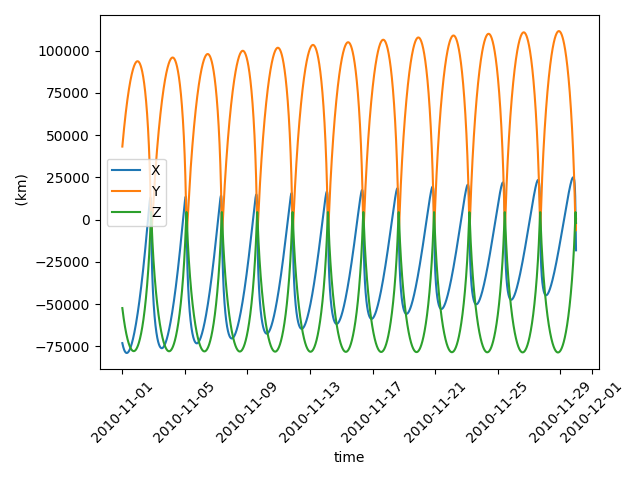

In [5]:
plt.figure()
spz.get_data(
    spz.inventories.tree.ssc.Trajectories.cluster4, "2010-11-01", "2010-11-30"
).plot()
plt.tight_layout()
plt.show()

## CSA spectrogram example

Speasy also support the Cluster Science Archive which mean you can get most Cluster 2 and Double Star products

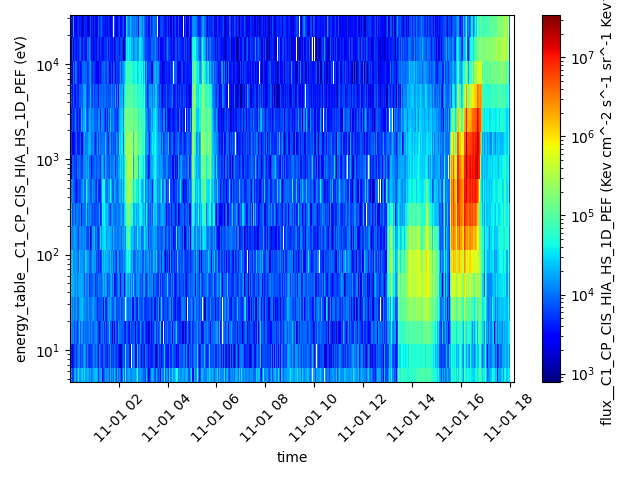

In [6]:
plt.figure()
spz.get_data(
    spz.inventories.tree.csa.Cluster.Cluster_1.CIS_HIA1.C1_CP_CIS_HIA_HS_1D_PEF.flux__C1_CP_CIS_HIA_HS_1D_PEF,
    "2006-11-01",
    "2006-11-02",
).plot(cmap="jet")
plt.tight_layout()
plt.show()

## Speasy can download several products at once for a given interval

Speasy `get_data` function is quite flexible and can download several products at once

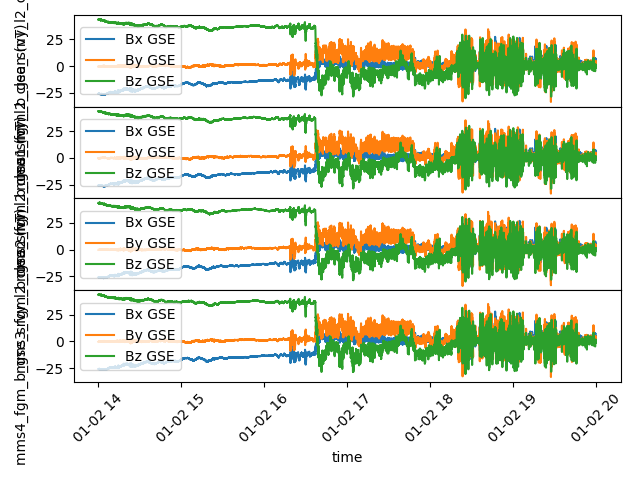

In [7]:
products = [
    spz.inventories.tree.cda.MMS.MMS1.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gse_srvy_l2_clean,
    spz.inventories.tree.cda.MMS.MMS2.FGM.MMS2_FGM_SRVY_L2.mms2_fgm_b_gse_srvy_l2_clean,
    spz.inventories.tree.cda.MMS.MMS3.FGM.MMS3_FGM_SRVY_L2.mms3_fgm_b_gse_srvy_l2_clean,
    spz.inventories.tree.cda.MMS.MMS4.FGM.MMS4_FGM_SRVY_L2.mms4_fgm_b_gse_srvy_l2_clean,
]

#fig = plt.figure(figsize=(20, 8))
fig = plt.figure()
gs = fig.add_gridspec(4, hspace=0)
axes = gs.subplots(sharex=True, sharey=True)
mms_fgm_b_gse_srvy: List[SpeasyVariable] = spz.get_data(
    products, "2019-01-02T14", "2019-01-02T20")
for var, ax in zip(mms_fgm_b_gse_srvy, axes):
    var["Bx GSE", "By GSE", "Bz GSE"].replace_fillval_by_nan().plot(ax=ax)
plt.tight_layout()
plt.show()


## Several product for several dates is also supported

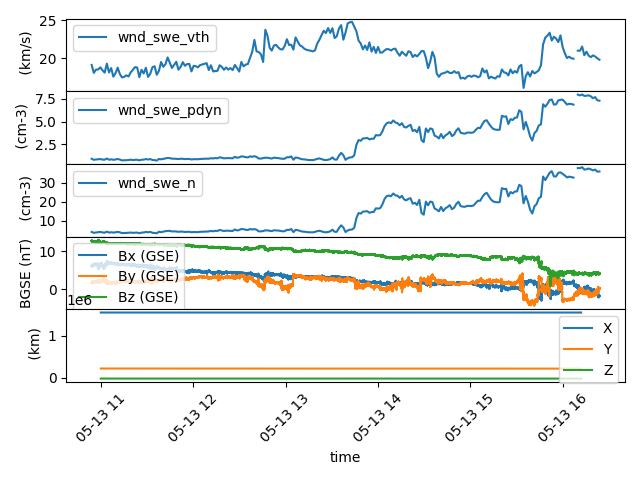

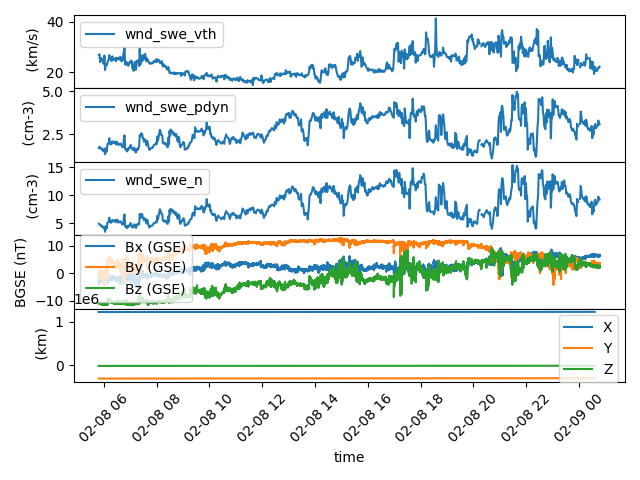

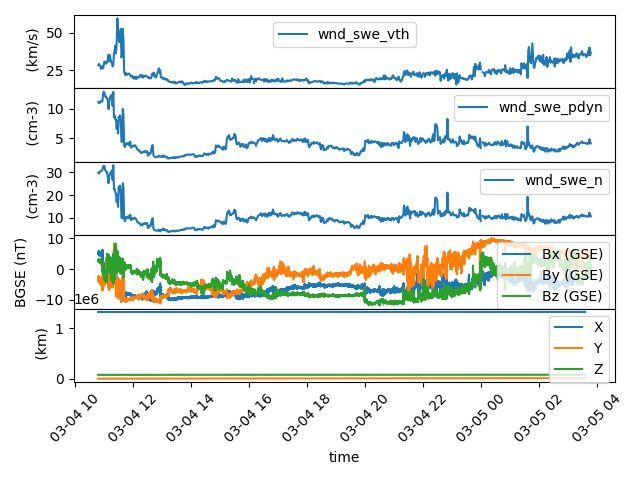

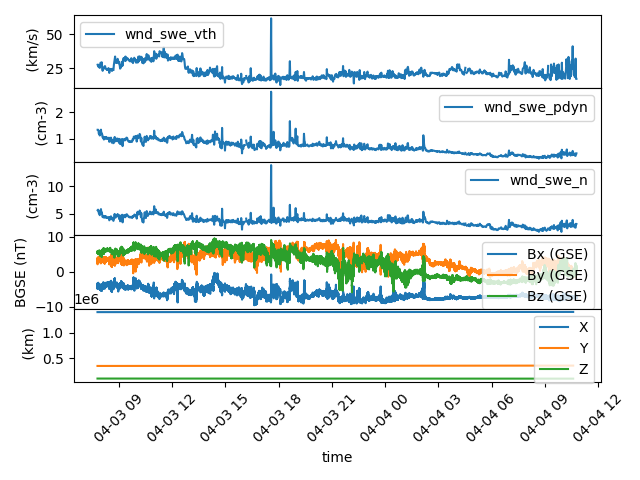

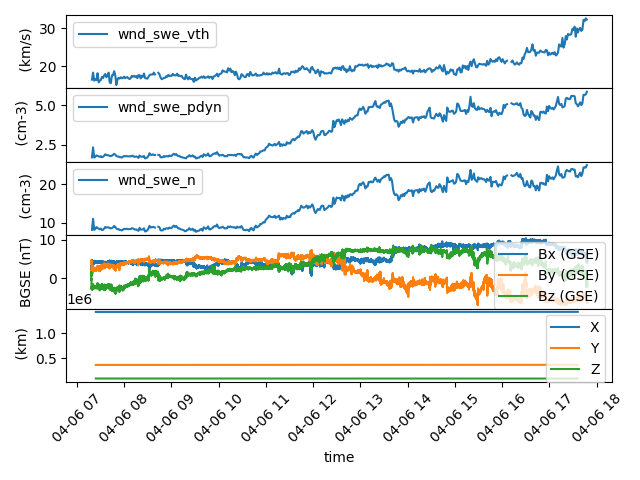

In [8]:
products = [
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_vth,
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_pdyn,
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_n,
    spz.inventories.tree.cda.Wind.WIND.MFI.WI_H2_MFI.BGSE,
    spz.inventories.tree.ssc.Trajectories.wind,
]

data_several_dates: List[List[SpeasyVariable]] = spz.get_data(
    products,
    spz.inventories.tree.amda.TimeTables.SharedTimeTables.SOLAR_WIND.Magnetic_Clouds
)

for i in range(5):
    #fig = plt.figure(figsize=(20, 6))
    fig = plt.figure()
    gs = fig.add_gridspec(5, hspace=0)
    axes = gs.subplots(sharex=True, sharey=False)
    for j in range(5):
        data_several_dates[j][i].plot(ax=axes[j])
    plt.tight_layout()
plt.show()


## get_data preserves input product list shape

Speasy `get_data` function support any nesting depth of product and time ranges lists, it will always explore products first then for each product get data for each given time range

In [9]:
data_preserve_shape: List[List[List[SpeasyVariable]]] = spz.get_data(
    [
        [
            spz.inventories.tree.cda.OMNI_Combined_1AU_IP_Data__Magnetic_and_Solar_Indices.OMNI_1AU_IP_Data.IMF_and_Plasma_data.OMNI_HRO_1MIN.Beta,
            spz.inventories.tree.cda.OMNI_Combined_1AU_IP_Data__Magnetic_and_Solar_Indices.OMNI_1AU_IP_Data.IMF_and_Plasma_data.OMNI_HRO_1MIN.T,
        ],
        [
            spz.inventories.tree.cda.OMNI_Combined_1AU_IP_Data__Magnetic_and_Solar_Indices.OMNI_1AU_IP_Data.IMF_and_Plasma_data.OMNI_HRO_1MIN.E,
            spz.inventories.tree.cda.OMNI_Combined_1AU_IP_Data__Magnetic_and_Solar_Indices.OMNI_1AU_IP_Data.IMF_and_Plasma_data.OMNI_HRO_1MIN.Pressure,
        ],
    ],
    [["2010-01-02", "2010-01-02T10"], ["2009-08-02", "2009-08-02T10"]]
)
data_preserve_shape


[[[<speasy.products.variable.SpeasyVariable at 0x7fb63bd2d900>,
 [[<speasy.products.variable.SpeasyVariable at 0x7fb63bde2080>,

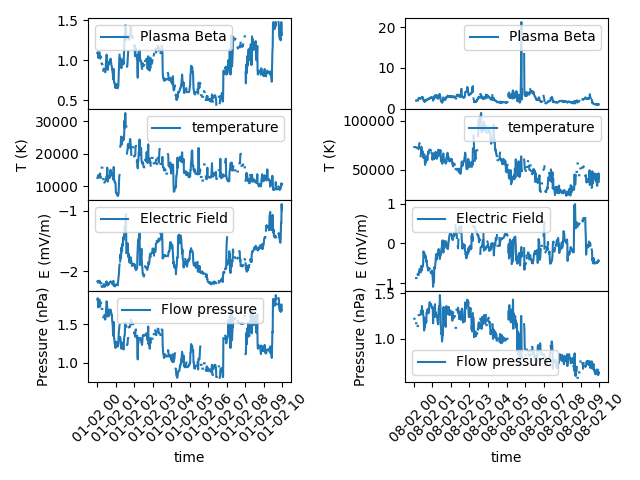

In [10]:
#fig = plt.figure(figsize=(20, 6))
fig = plt.figure()
gs = fig.add_gridspec(1, 2)
left_gs = gs[0, 0].subgridspec(4, 1, hspace=0)
right_gs = gs[0, 1].subgridspec(4, 1, hspace=0)
left_ax = left_gs.subplots(sharex=True, sharey=False)
right_ax = right_gs.subplots(sharex=True, sharey=False)

data_preserve_shape[0][0][0].replace_fillval_by_nan().plot(ax=left_ax[0])
data_preserve_shape[0][1][0].replace_fillval_by_nan().plot(ax=left_ax[1])
data_preserve_shape[1][0][0].replace_fillval_by_nan().plot(ax=left_ax[2])
data_preserve_shape[1][1][0].replace_fillval_by_nan().plot(ax=left_ax[3])

data_preserve_shape[0][0][1].replace_fillval_by_nan().plot(ax=right_ax[0])
data_preserve_shape[0][1][1].replace_fillval_by_nan().plot(ax=right_ax[1])
data_preserve_shape[1][0][1].replace_fillval_by_nan().plot(ax=right_ax[2])
data_preserve_shape[1][1][1].replace_fillval_by_nan().plot(ax=right_ax[3])
plt.tight_layout()
plt.show()

## Some SpeasyVariable tricks


### Attributes

A SpeasyVariable is close to a pandas DataFrame, it has few attributes, most of them are extracted from underlying CDF or CSV files generated by corresponding web-services:

In [11]:
solo_fgm: SpeasyVariable = spz.get_data(
    spz.inventories.tree.cda.Solar_Orbiter.SOLO.MAG.SOLO_L2_MAG_RTN_NORMAL.B_RTN,
    "2022-03-01",
    "2022-03-01T12",
)
print("===========================================")
print(f"Name:         {solo_fgm.name}")
print(f"Columns:      {solo_fgm.columns}")
print(f"Values Unit:  {solo_fgm.unit}")
print(f"Memory usage: {solo_fgm.nbytes} Bytes")
print(f"Axes Labels:  {solo_fgm.axes_labels}")
print("-------------------------------------------")
print(f"Meta-data:    {solo_fgm.meta}")
print("-------------------------------------------")
print(f"Time Axis:    {solo_fgm.time[:3]}")
print("-------------------------------------------")
print(f"Values:       {solo_fgm.values[:3]}")
print("===========================================")

Name:         B_RTN
Columns:      ['B_r', 'B_t', 'B_n']
Values Unit:  nT
Memory usage: 11059947 Bytes
Axes Labels:  ['time']
-------------------------------------------
Meta-data:    {'DIM_SIZES': [3], 'VALIDMIN': [-10000000000.0], 'UNITS': 'nT', 'TENSOR_ORDER': '1', 'SI_CONVERSION': '1.0E-9>T', 'FIELDNAM': 'B RTN', 'VAR_TYPE': 'data', 'VALIDMAX': [10000000000.0], 'CATDESC': 'Magnetic field vector in RTN coordinates', 'SCALETYP': 'linear', 'COORDINATE_SYSTEM': 'RTN', 'SCALEMIN': [-80000.0], 'DEPEND_0': 'EPOCH', 'DETECTOR': 'PRI>Primary Sensor', 'LABL_PTR_1': ['B_r', 'B_t', 'B_n'], 'DISPLAY_TYPE': 'time_series', 'REPRESENTATION_1': 'REP1_B_RTN', 'FILLVAL': [nan], 'FORMAT': 'f11.4', 'SCALEMAX': [80000.0]}
-------------------------------------------
Time Axis:    ['2022-03-01T00:00:00.002997368' '2022-03-01T00:00:00.128001719'
 '2022-03-01T00:00:00.252996012']
-------------------------------------------
Values:       [[-1.60646439e-01 -6.34788084e+00  8.59271908e+00]
 [-9.50906351e-02 -5.

### Methods

SpeasyVaraible class is not meant to be as fully-featured as pandas DataFrame or Xarray DataArray but still has few useful features

- you can make a (deep)copy of a SpeasyVariable:

In [12]:
solo_fgm2 = solo_fgm.copy()
solo_fgm2 is solo_fgm, solo_fgm == solo_fgm2

(False, True)

- you can build a new variable with only a subset of columns of a given variable

In [13]:
solo_fgm2 = solo_fgm.filter_columns(["B_r", "B_t"])
print(solo_fgm.columns, solo_fgm2.columns)

['B_r', 'B_t', 'B_n'] ['B_r', 'B_t']


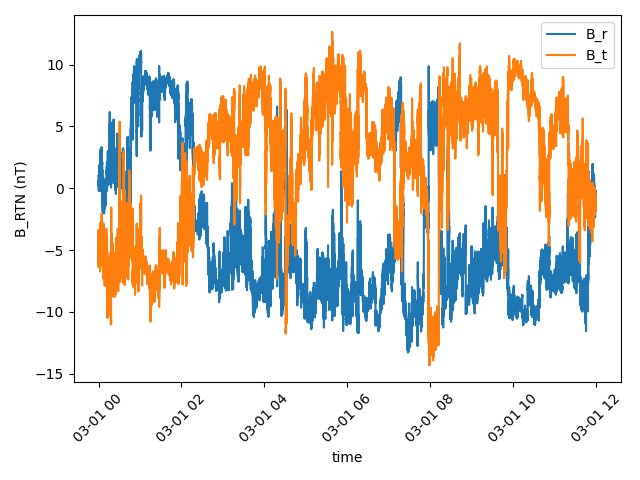

In [14]:
plt.figure("Variable with filtered columns")
solo_fgm.filter_columns(["B_r", "B_t"]).plot()
plt.tight_layout()
plt.show()

- you can export simple time-series to Astropy Tables or pandas DataFrames

In [15]:
solo_fgm.to_astropy_table()[:10].show_in_notebook()

idx,index,B_r,B_t,B_n
,,nT,nT,nT
0,2022-03-01T00:00:00.003,-0.1606464385986328,-6.347880840301514,8.592719078063965
1,2022-03-01T00:00:00.128,-0.09509063512086868,-5.765442848205566,8.891261100769043
2,2022-03-01T00:00:00.253,0.005366124678403139,-5.061336994171143,9.567541122436523
3,2022-03-01T00:00:00.378,0.15816348791122437,-4.390467166900635,9.742783546447754
4,2022-03-01T00:00:00.503,0.32297953963279724,-3.519103527069092,10.105829238891602
5,2022-03-01T00:00:00.628,0.3430927097797394,-3.35725736618042,10.344118118286133
6,2022-03-01T00:00:00.753,0.3470951020717621,-3.4207091331481934,10.327160835266113
7,2022-03-01T00:00:00.878,0.34618058800697327,-3.4167754650115967,10.308568954467773
8,2022-03-01T00:00:01.003,0.32561907172203064,-3.41884183883667,10.286155700683594


In [17]:
solo_fgm.to_dataframe().head()

,B_r,B_t,B_n
2022-03-01 00:00:00.002997368,-0.160646,-6.347881,8.592719
2022-03-01 00:00:00.128001719,-0.095091,-5.765443,8.891261
2022-03-01 00:00:00.252996012,0.005366,-5.061337,9.567541
2022-03-01 00:00:00.378000363,0.158163,-4.390467,9.742784
2022-03-01 00:00:00.503004714,0.322980,-3.519104,10.105829


- you can slice a SpeasyVariable by index or time

In [18]:
solo_fgm[:5].to_dataframe()

,B_r,B_t,B_n
2022-03-01 00:00:00.002997368,-0.160646,-6.347881,8.592719
2022-03-01 00:00:00.128001719,-0.095091,-5.765443,8.891261
2022-03-01 00:00:00.252996012,0.005366,-5.061337,9.567541
2022-03-01 00:00:00.378000363,0.158163,-4.390467,9.742784
2022-03-01 00:00:00.503004714,0.322980,-3.519104,10.105829


In [19]:
solo_fgm[np.datetime64("2022-03-01T00:00:00"): np.datetime64("2022-03-01T00:00:00.6")].to_dataframe()

,B_r,B_t,B_n
2022-03-01 00:00:00.002997368,-0.160646,-6.347881,8.592719
2022-03-01 00:00:00.128001719,-0.095091,-5.765443,8.891261
2022-03-01 00:00:00.252996012,0.005366,-5.061337,9.567541
2022-03-01 00:00:00.378000363,0.158163,-4.390467,9.742784
2022-03-01 00:00:00.503004714,0.322980,-3.519104,10.105829


In [20]:
solo_fgm[datetime(2022,3,1): datetime(2022,3,1,microsecond=600000)].to_dataframe()

,B_r,B_t,B_n
2022-03-01 00:00:00.002997368,-0.160646,-6.347881,8.592719
2022-03-01 00:00:00.128001719,-0.095091,-5.765443,8.891261
2022-03-01 00:00:00.252996012,0.005366,-5.061337,9.567541
2022-03-01 00:00:00.378000363,0.158163,-4.390467,9.742784
2022-03-01 00:00:00.503004714,0.322980,-3.519104,10.105829


- you can convert values into Astropy Quantity:

In [21]:
solo_fgm[:5].unit_applied().values


<Quantity [[-1.60646439e-01, -6.34788084e+00,  8.59271908e+00],
           [-9.50906351e-02, -5.76544285e+00,  8.89126110e+00],
           [ 5.36612468e-03, -5.06133699e+00,  9.56754112e+00],
           [ 1.58163488e-01, -4.39046717e+00,  9.74278355e+00],
           [ 3.22979540e-01, -3.51910353e+00,  1.01058292e+01]] nT>